In [1]:
# Iris 데이터셋 실습 문제 전체 코드

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 문제 1, 2, 3: 데이터 로드 및 구조 확인
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
iris_data['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("총 데이터 수:", len(iris_data))
print("총 열 수:", iris_data.shape[1])
print("열 이름:", iris_data.columns.tolist())

총 데이터 수: 150
총 열 수: 5
열 이름: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [2]:
# 문제 4: 기본 정보 확인
print("\n비어있는 값:")
print(iris_data.isnull().sum())
print("\n숫자 열 수:", iris_data.select_dtypes(include='number').shape[1])

# 문제 5: 간단한 계산
print("\n꽃받침 길이 평균:", iris_data['SepalLengthCm'].mean())
print("꽃잎 너비 최댓값:", iris_data['PetalWidthCm'].max())


비어있는 값:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

숫자 열 수: 4

꽃받침 길이 평균: 5.843333333333334
꽃잎 너비 최댓값: 2.5


In [3]:
# 문제 6: 종류별 개수
print("\n붓꽃 종류별 개수:")
print(iris_data['Species'].value_counts())

# 문제 7: 조건 필터링
print("\n꽃잎 길이 > 2.0인 데이터 수:", len(iris_data[iris_data['PetalLengthCm'] > 2.0]))
print("꽃받침 너비 > 3.5인 데이터 수:", len(iris_data[iris_data['SepalWidthCm'] > 3.5]))



붓꽃 종류별 개수:
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

꽃잎 길이 > 2.0인 데이터 수: 100
꽃받침 너비 > 3.5인 데이터 수: 19



versicolor 평균 꽃잎 길이: 4.26
virginica 최대 꽃받침 너비: 3.8


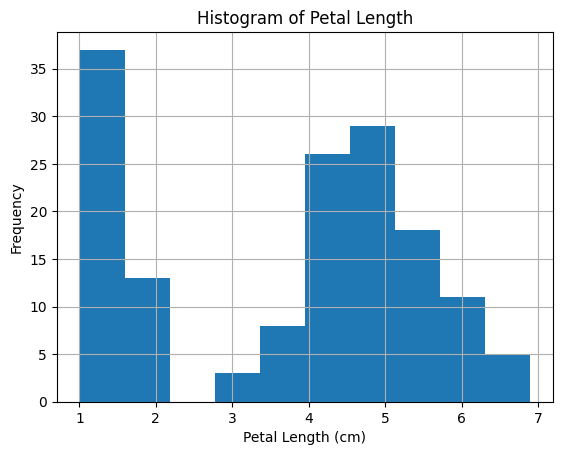

In [4]:
# 문제 8: 특정 종류 분석
print("\nversicolor 평균 꽃잎 길이:", iris_data[iris_data['Species'] == 'versicolor']['PetalLengthCm'].mean())
print("virginica 최대 꽃받침 너비:", iris_data[iris_data['Species'] == 'virginica']['SepalWidthCm'].max())

# 문제 9: 히스토그램
iris_data['PetalLengthCm'].hist()
plt.title("Histogram of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()

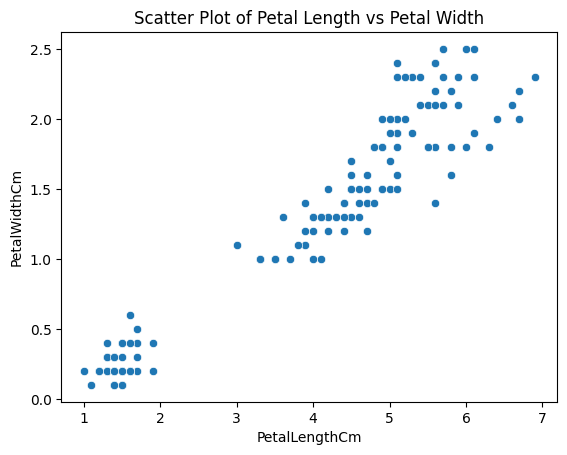

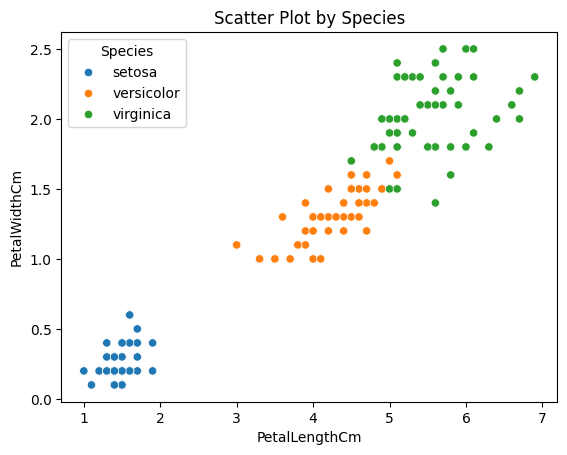

In [5]:
# 문제 10: 산점도
sns.scatterplot(data=iris_data, x='PetalLengthCm', y='PetalWidthCm')
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.show()

# 문제 11: 종류별 산점도
sns.scatterplot(data=iris_data, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("Scatter Plot by Species")
plt.show()


종류별 평균:
            SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                             
setosa              5.006         3.428          1.462         0.246
versicolor          5.936         2.770          4.260         1.326
virginica           6.588         2.974          5.552         2.026


/var/folders/z1/dwq20z6d3_58gg4yqj4pcn0m0000gn/T/ipykernel_90088/1822234334.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_species = iris_data.groupby('Species').mean(numeric_only=True)


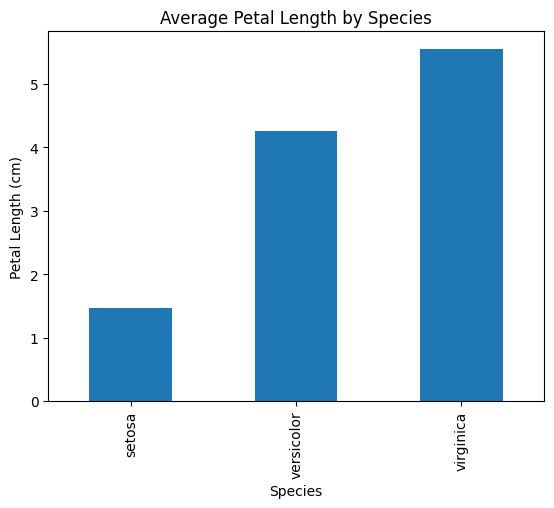

In [6]:
# 문제 12: 평균 비교 표
mean_by_species = iris_data.groupby('Species').mean(numeric_only=True)
print("\n종류별 평균:")
print(mean_by_species)

# 문제 13: 막대그래프
mean_by_species['PetalLengthCm'].plot(kind='bar')
plt.title("Average Petal Length by Species")
plt.ylabel("Petal Length (cm)")
plt.show()

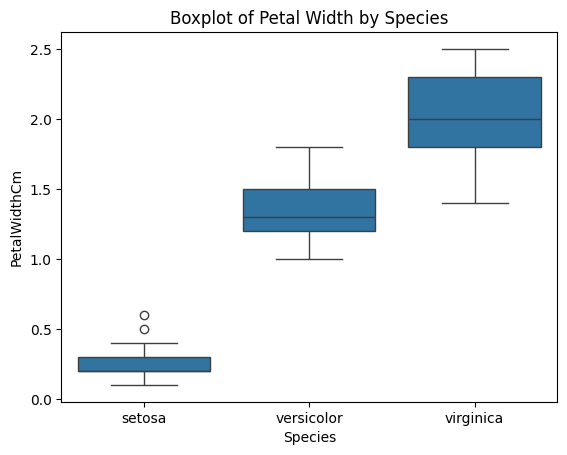


꽃받침 면적이 가장 큰 종류: virginica
꽃잎 면적이 가장 큰 종류: virginica


In [8]:
# 문제 14: 박스플롯
sns.boxplot(data=iris_data, x='Species', y='PetalWidthCm')
plt.title("Boxplot of Petal Width by Species")
plt.show()

# 문제 15: 면적 계산
iris_data['SepalArea'] = iris_data['SepalLengthCm'] * iris_data['SepalWidthCm']
iris_data['PetalArea'] = iris_data['PetalLengthCm'] * iris_data['PetalWidthCm']
print("\n꽃받침 면적이 가장 큰 종류:", iris_data.groupby('Species', observed=True)['SepalArea'].mean().idxmax())
print("꽃잎 면적이 가장 큰 종류:", iris_data.groupby('Species', observed=True)['PetalArea'].mean().idxmax())


In [9]:
# 문제 16: 필터링 조건
filtered = iris_data[(iris_data['SepalWidthCm'] >= 3.0) & (iris_data['PetalWidthCm'] >= 1.5)]
print("\n필터 조건에 맞는 데이터 수:", len(filtered))
print("종류별 개수:")
print(filtered['Species'].value_counts())

# 문제 17: 상위 10개
top_10 = iris_data.sort_values(by=['PetalLengthCm', 'PetalWidthCm'], ascending=False).head(10)
print("\nTop 10 데이터의 주요 종:")
print(top_10['Species'].value_counts())



필터 조건에 맞는 데이터 수: 39
종류별 개수:
Species
virginica     29
versicolor    10
setosa         0
Name: count, dtype: int64

Top 10 데이터의 주요 종:
Species
virginica     10
setosa         0
versicolor     0
Name: count, dtype: int64
